<a href="https://colab.research.google.com/github/Azadshokrollahi/Artificial-intelligence-for-data-science-/blob/main/Lab2.2-svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#EE15D'>**SVM**</font>

<font color='#EE15D'>**Questions:**</font>

1.   LinearSVC section: Create 2 models (model1, model2), compare the results after visulizations, Which one is a better classifier for this dataset?
2.   SVC section: Create one model (model3), with SVC and compare it with 2 previous models after visulizations .
1.   Use model3.support_ and model3.n_support_ to determine the number of support vectors in each class in model 3. Visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?
2.   NuSVC section, Create one model (model4) with NuSVC, and compare it with 3 previous models after visulizations.
1.   Visualize model 4 and compare the number of support vector machines with model 3.
2.   Kernel Trick section: Create 3 models (model5, model6, and model7), Visualize the results of the 3 models and interpret them. Which model best fits the data?

<font color='#EE15D'>Note:</font> Proceed through the code, answering the questions one by one in separate cells, each inserted after its corresponding question.






## **🔸 Imports**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<font color='#EE15D'>Note:</font>  Before starting, if you are not familiar with scikit-learn or how to import, please study this link.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html



## **🔸 SVM (sklearn)**

In [61]:
from sklearn.svm import LinearSVC, SVC, NuSVC

<font color='#EE15D'>We have created a dataset with 1000 samples and 2 classes

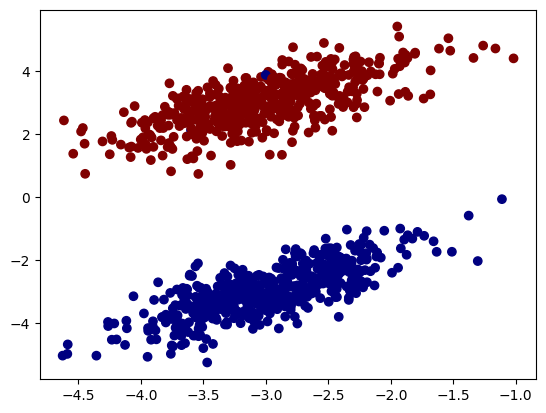

In [62]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

### `LinearSVC`

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'>Create 2 models based on the following hyperparameters and compare the results after visulizations:



*   **model1**: LinearSVC, loss= hinge, C=1.2, max_iter=2000
*   **model2**: LinearSVC, loss= squared_hinge, C=2.5, max_iter=1000

<font color='#EE15D'>Which one is a better classifier for this dataset?


As seen in the figure below, we notice that model1 performs slightly better on the data where model2 shows much more misclassification and a wider margin that cuts through the core of the clusters rather than aligning closer with the support vectors.





In [63]:
model1 = LinearSVC(loss='hinge', C=1.2, max_iter=2000, random_state=42)
model1.fit(X, y)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.2
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [64]:
model2 = LinearSVC(loss='squared_hinge', C=2.5, max_iter=1000, random_state=42)
model2.fit(X, y)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,2.5
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


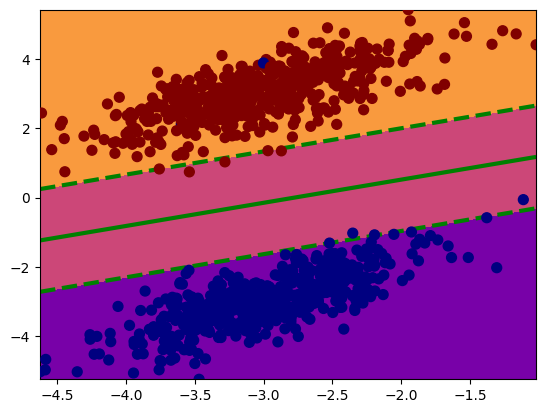

In [87]:
#Use this code for visualization for both models
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model1.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

### `SVC`

<font color='#GG15D'>**Question2:** </font> <font color='#EE15D'>Create one model (model3) with SVC based on the following info and compare it with 2 previous models after visulizations:



*   **model3**: SVC, C=1.0, kernel=linear, probability=True


- **Answer:** The third model shows further improvements with the margin alignment with the support vectors, even compared with model 1. This difference is very small though. Although the margin width is smaller, suggesting the model may be overfitting.



In [75]:
model3 = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
model3.fit(X, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


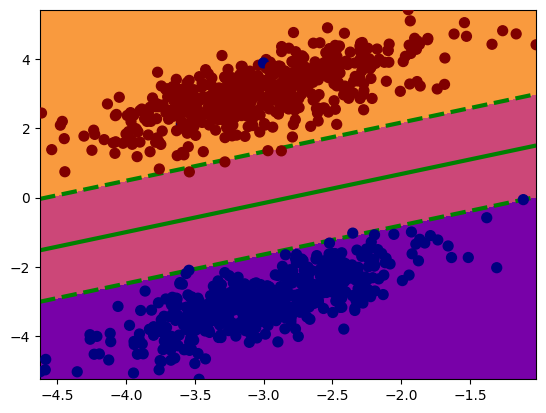

In [76]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)


<font color='#GG15D'>**Question3**:</font> Use <font color='#EE15D'> model3.support_</font> and <font color='#EE15D'>model3.n_support_</font> to determine the number of support vectors in each class. Then, use the code below to visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?

- **Answer**: Class 1 has 5 and class 2 has 4 support vectors, but we see on the graph that 2 outliers exist in class 1.

In [70]:
model3.support_, model3.n_support_

(array([154, 225, 770, 808, 902, 115, 208, 819, 930], dtype=int32),
 array([5, 4], dtype=int32))

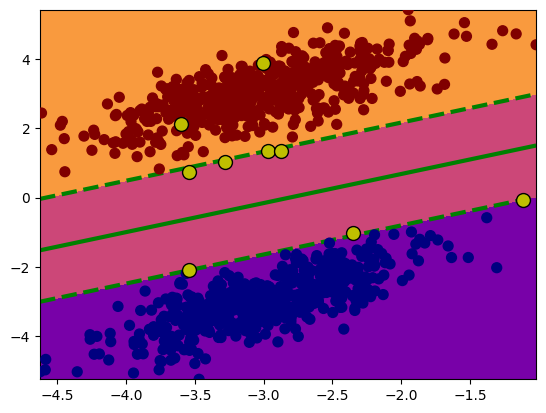

In [79]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)
sv = model3.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='y', s=100, edgecolors='k')

### `NuSVC`

<font color='#GG15D'>**Question4**:</font> <font color='#EE15D'>Create one model (model4) with NuSVC based on the following hyperparameters and compare it with 3 previous models after visulizations:



*   **model4**: NuSVC, nu=0.95, kernel=linear, probability=True

- **Answer**: This model is very messy, it's allowing up to 95% of datapoints to be support vectors or misclassified, resulting in a very chaotic classification that seems entirely random. (It's not very clear for me what the difference in question 4 and 5 is? both are asking me to compare model 4 with other models visually as I understand.)


In [90]:
model4 = NuSVC(nu=0.95, kernel='linear', probability=True)
model4.fit(X, y)

,nu,0.95
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


<font color='#GG15D'>**Question5**:</font> <font color='#EE15D'>Visualize model 4 with the following code and compare the number of support vector machines with model 3.

- **Answer:** As I mentioned in the answer to the previous question, the model allows up 95% of the data to be support vectors and we see that visually here. And the margin for the decision boundaries is very wide, way too wide showing that there is a large amount of misclassification and very unclear boarders between class 1 and class 2. 

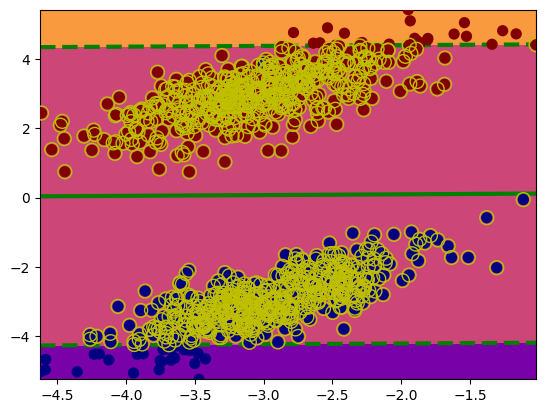

In [91]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model4.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model4.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

## **🔸 Kernel Trick (sklearn)**

<font color='#EE15D'>When the dataset is not linearly separable

In [92]:
from sklearn.svm import SVC

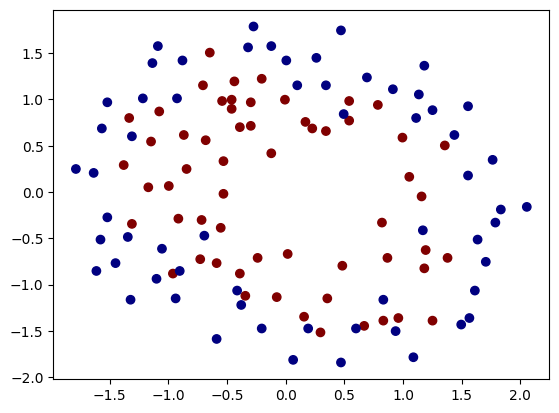

In [93]:
#Load the dataset
data = np.loadtxt('Lab2-Data/ex2data2.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

<font color='#GG15D'>**Question6**: <font color='#EE15D'>Create 3 models (model5, model6, and model7) with the following hyperparameters:



*   **model5** : SVC, C=1.0, kernel=poly, degree=2, coef0=1
*   **model6** : SVC, C=1.0, kernel=rbf, degree=2, coef0=1
*   **model7** : SVC, C=1.0, kernel=sigmoid, degree=2, coef0=1

<font color='#EE15D'>Visualize the results of the 3 models and interpret them. Which model best fits the data?






In [94]:
model5 = SVC(kernel="poly", C=1.0, degree=2, coef0=1)
model5.fit(X, y)

,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,1
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [95]:
model6 = SVC(kernel="rbf", C=1.0, degree=2, coef0=1)
model6.fit(X, y)

,C,1.0
,kernel,'rbf'
,degree,2
,gamma,'scale'
,coef0,1
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [96]:
model7 = SVC(kernel="sigmoid", C=1.0, degree=2, coef0=1)
model7.fit(X, y)

,C,1.0
,kernel,'sigmoid'
,degree,2
,gamma,'scale'
,coef0,1
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


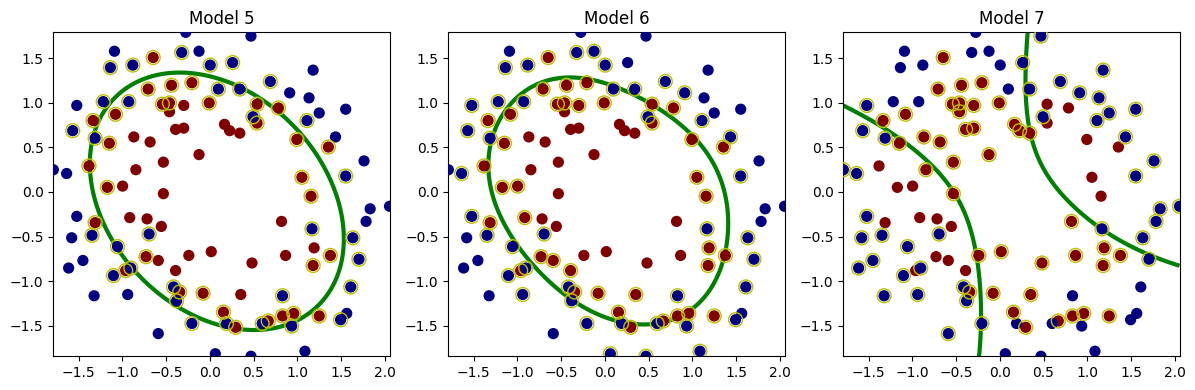

In [101]:
# To make things a bit easier visually, I just changed it to a sub plot with each model.
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

models = [model5, model6, model7]
titles = ["Model 5", "Model 6", "Model 7"]


def plot_decision_boundary(model, X, y, ax):
    n = 1000
    xmin, xmax = X.min(0), X.max(0)
    x1r = np.linspace(xmin[0], xmax[0], n)
    x2r = np.linspace(xmin[1], xmax[1], n)
    x1m, x2m = np.meshgrid(x1r, x2r)

    Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
    ym = model.decision_function(Xm)
    ym = ym.reshape(x1m.shape)

    ax.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

    sv = model.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

for i in range(3):
    ax = axes[i]
    plot_decision_boundary(models[i], X, y, ax)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

When comparing the three kernels, the polynomial (Model 5) and RBF (Model 6) both form smooth, non-linear boundaries that roughly enclose the central cluster of one class. The RBF kernel provides the most natural fit, seemingly fitting better to the support vectors, but the difference in model 5 and model 6 is visually minimal. The sigmoid kernel (Model 7) produces irregular and fragmented boundaries, indicating poor generalization and instability. Overall, RBF offers the best trade-off between flexibility and generalization for this dataset.